In [1]:
from sklearn.datasets import make_classification

In [2]:
X,Y= make_classification(n_features=15,
                         n_samples=1000,
                         n_informative=12,
                         n_classes=3,
                        random_state=12)

In [3]:
Y

array([1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0,
       1, 2, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0,
       0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0,
       0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0,
       0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0,
       2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2,
       1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0,

In [4]:
import pandas as pd
X=pd.DataFrame(X)

### converting output variable to categorical(get dummies)

In [5]:
from keras.utils import to_categorical
Y=to_categorical(Y)
Y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

## train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)  
#statify set equal proportion of Y classes in both training and testing


In [8]:
x_train.shape

(800, 15)

In [9]:
x_test.shape

(200, 15)

###  Scaling 

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

### building NN model

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping  #it is used to stop overfitting

In [13]:
nn=Sequential()
#1st layer 
nn.add(Dense(64,activation='relu',input_dim=x_train.shape[1]))
nn.add(Dropout(0.2))
#2nd hidden layer
nn.add(Dense(32,activation='relu'))
nn.add(Dropout(0.2))
#output layer
nn.add(Dense(3,activation='softmax'))

In [14]:
earlystopping=EarlyStopping(monitor='val_loss', patience=15)

In [15]:
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Training the model

In [16]:
hist = nn.fit(x_train,y_train,validation_split=0.2,epochs=200,callbacks=[earlystopping])

Epoch 1/200
20/20 [==============================] - 1s 9ms/step - loss: 1.1912 - accuracy: 0.3438 - val_loss: 1.0226 - val_accuracy: 0.4375
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 1.0186 - accuracy: 0.4781 - val_loss: 0.9491 - val_accuracy: 0.5813
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.9085 - accuracy: 0.6141 - val_loss: 0.8761 - val_accuracy: 0.6313
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8182 - accuracy: 0.6484 - val_loss: 0.8015 - val_accuracy: 0.7125
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7529 - accuracy: 0.7203 - val_loss: 0.7425 - val_accuracy: 0.7375
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7293 - accuracy: 0.7016 - val_loss: 0.6982 - val_accuracy: 0.7375
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.7391 - val_loss: 0.6573 - val_accuracy: 0.7625
Epoch 8/200
2

Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9328 - val_loss: 0.3408 - val_accuracy: 0.9000
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9250 - val_loss: 0.3289 - val_accuracy: 0.9000
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9516 - val_loss: 0.3273 - val_accuracy: 0.9000
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9344 - val_loss: 0.3332 - val_accuracy: 0.9062
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9375 - val_loss: 0.3325 - val_accuracy: 0.8938
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9438 - val_loss: 0.3448 - val_accuracy: 0.8938
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9312 - val_loss: 0.3391 - val_accuracy: 0.9125
Epoch 

## Plotting the learning curve

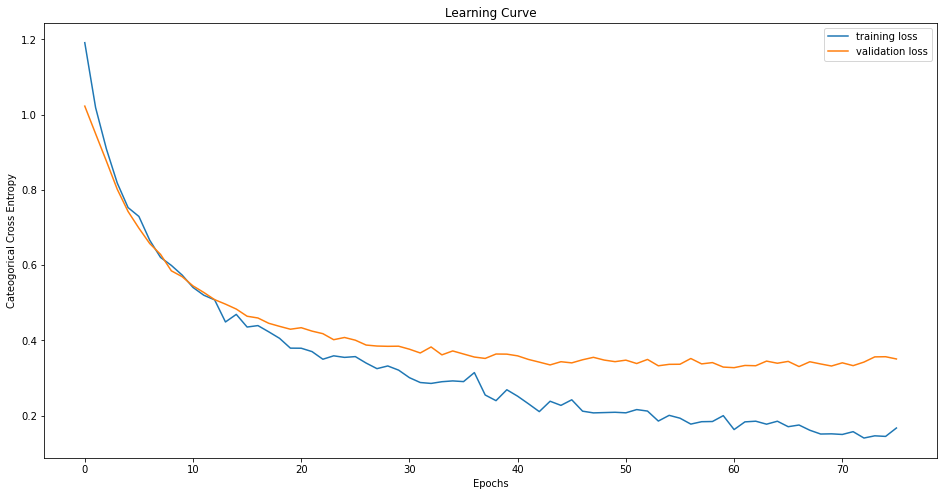

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Cateogorical Cross Entropy')
plt.show()

## Plotting accuracy of model with epochs

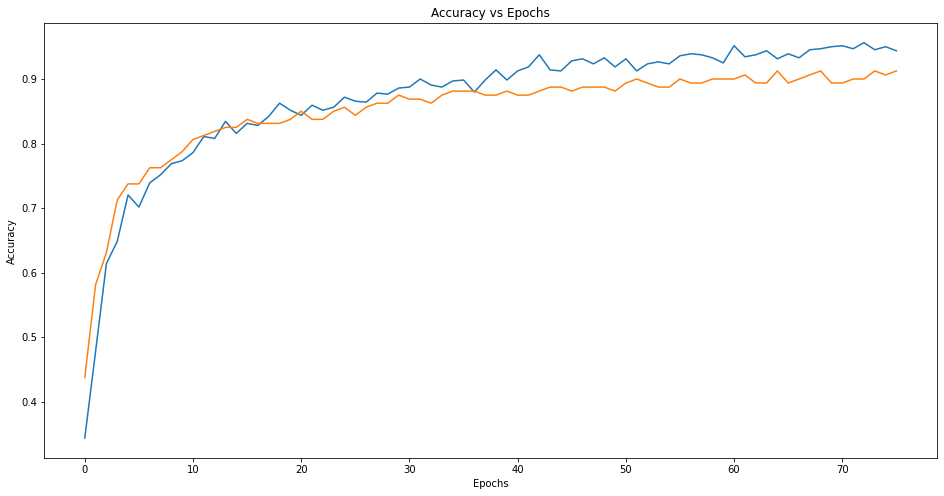

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['accuracy'],label='training loss')
plt.plot(hist.history['val_accuracy'],label='validation loss')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## model evaluation

In [19]:
# Evaluate model on train data
nn.evaluate(x_train,y_train)

25/25 [==============================] - 0s 837us/step - loss: 0.1199 - accuracy: 0.9750


[0.11986316740512848, 0.9750000238418579]

In [20]:
# Evaluate model on testing data
nn.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8900


[0.35142430663108826, 0.8899999856948853]

## Showing model predictions on test data

In [21]:
ypred_test = nn.predict(x_test)

7/7 [==============================] - 0s 1ms/step


In [22]:
ypred_test

array([[5.04548616e-08, 9.98995602e-01, 1.00434304e-03],
       [9.84080017e-01, 4.59406525e-03, 1.13259461e-02],
       [1.20612123e-04, 9.98862267e-01, 1.01713266e-03],
       [7.51374662e-02, 5.01811862e-01, 4.23050731e-01],
       [1.40028733e-05, 1.53390632e-04, 9.99832630e-01],
       [7.06082396e-03, 9.92938876e-01, 2.46795736e-07],
       [9.91949320e-01, 1.31466391e-03, 6.73602661e-03],
       [1.30212102e-05, 9.99675751e-01, 3.11253301e-04],
       [4.82721895e-01, 2.16154590e-01, 3.01123440e-01],
       [8.08621757e-03, 6.91682240e-03, 9.84996915e-01],
       [4.06608963e-03, 6.67910697e-03, 9.89254832e-01],
       [9.97331262e-01, 1.03229680e-03, 1.63639837e-03],
       [1.72705983e-03, 9.98165309e-01, 1.07644511e-04],
       [8.72873247e-01, 1.22480914e-01, 4.64584539e-03],
       [9.84553576e-01, 5.03183110e-03, 1.04146246e-02],
       [1.31679466e-03, 1.40025038e-02, 9.84680712e-01],
       [9.63591099e-01, 1.62738710e-04, 3.62461358e-02],
       [9.75951076e-01, 1.61894

In [23]:
import numpy as np
ypred_class=np.argmax(ypred_test,axis=1)

In [24]:
#predicted data
ypred_class

array([1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2,
       0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2,
       1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       2, 0], dtype=int64)

In [25]:
#actual data
ypred_test=np.argmax(y_test,axis=1)
ypred_test

array([1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2,
       1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2,
       0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2,
       2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       1, 0], dtype=int64)

## Evaluation metrix

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
cf=confusion_matrix(ypred_test,ypred_class)
cf

array([[61,  4,  2],
       [ 6, 55,  5],
       [ 3,  2, 62]], dtype=int64)

<AxesSubplot:>

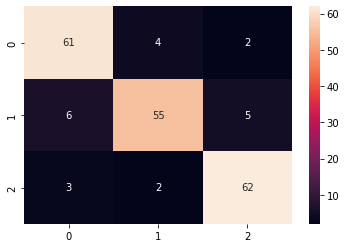

In [28]:
import seaborn as sns
sns.heatmap(cf,annot=True)

In [29]:
print(classification_report(ypred_test,ypred_class))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        67
           1       0.90      0.83      0.87        66
           2       0.90      0.93      0.91        67

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [30]:
#actual training 
yactual_training=np.argmax(y_train,axis=1)

In [31]:
y_pred_train=nn.predict(x_train)
y_pred_train

25/25 [==============================] - 0s 752us/step


array([[9.1911918e-01, 8.0878355e-02, 2.4373785e-06],
       [4.4871359e-03, 9.9549520e-01, 1.7740687e-05],
       [1.1622605e-03, 9.9877876e-01, 5.8949863e-05],
       ...,
       [8.8432091e-01, 5.8865692e-02, 5.6813348e-02],
       [9.9571604e-01, 2.5924812e-03, 1.6914713e-03],
       [9.8047251e-01, 4.2971467e-05, 1.9484533e-02]], dtype=float32)

In [32]:
#predicted training 
ypred_training=np.argmax(y_pred_train,axis=1)

In [33]:
cf=confusion_matrix(ypred_training,yactual_training)
cf

array([[266,   8,   3],
       [  1, 252,   1],
       [  1,   6, 262]], dtype=int64)

<AxesSubplot:>

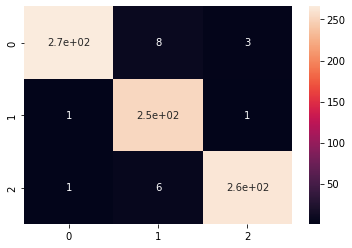

In [34]:
sns.heatmap(cf,annot=True)

In [35]:
print(classification_report(ypred_training,yactual_training))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       277
           1       0.95      0.99      0.97       254
           2       0.98      0.97      0.98       269

    accuracy                           0.97       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.97      0.98       800

